# this is a file for calculating the Lagrangian rate of change of the log-scale $Chl_a$ using  $\frac{D \ ( log_{10} Chl_a)}{Dt}:=\frac{1}{Chl_a}\frac{D \ ( Chl_a)}{Dt}$
* aaa
  * aaa
    * aaa
    * aaa

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import xarray as xr

/Users/vyan2000/local/miniconda3/envs/condapython3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# load the floats data 
# ********************
# *** CSV files ***
# ********************
# load the floats data, take the lon and lat as list out and calculate the distance

# load CSV output    
# some how the CSV Format has some compatibility issues here
# see readme file for the file convetion in the experiments,
# for instance "3" indicates distance is addd to the dataset 
df_chl_out_4D_3 = pd.read_csv('./data_collector_modisa_chla9km/df_chl_out_4D_modisa_3.csv', \
                              index_col='index')
df_chl_out_4D_3

,id,time,lat,spd,var_lon,vn,var_lat,lon,ve,temp,var_tmp,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist
index,,,,,,,,,,,,,,,,
6239,34710,2002-11-01,16.907900,13.195850,0.000120,12.28250,0.000063,63.130950,1.024050,28.998850,0.001754,0.386388,-0.412976,0.060749,-1.216459,592.46100
6476,10206,2002-11-06,11.049700,9.697750,0.001602,6.51645,0.000517,67.176750,-4.161400,NaN,1000.000000,0.133946,-0.873070,0.005581,-2.253287,536.67500
6498,34710,2002-11-06,17.339050,11.972150,0.000159,10.54180,0.000079,63.148450,-2.067400,28.832700,0.001884,0.379611,-0.420661,-0.006777,NaN,562.59100
6504,34721,2002-11-06,12.589150,15.204350,0.000143,0.91040,0.000071,67.828050,10.477750,29.497000,0.001856,0.148202,-0.829147,0.009522,-2.021272,487.07000
6735,10206,2002-11-11,11.160300,2.944400,0.001463,1.00360,0.000474,67.111450,-0.923050,NaN,1000.000000,0.125101,-0.902739,-0.008845,NaN,545.14200
6757,34710,2002-11-11,17.986600,27.674550,0.000102,26.75225,0.000055,62.959850,-2.543400,28.167400,0.001775,0.500674,-0.300445,0.121063,-0.916988,503.53300
6994,10206,2002-11-16,11.166650,3.065200,0.006093,-0.48170,0.001546,67.051800,-1.909650,NaN,1000.000000,0.140332,-0.852843,0.015231,-1.817272,549.51100
7016,34710,2002-11-16,19.448750,47.484750,0.000162,40.73835,0.000079,62.765100,-17.921000,27.723950,0.001810,0.569412,-0.244573,0.068738,-1.162806,416.43400
7257,15707,2002-11-21,12.418600,20.834500,0.000118,2.76235,0.000062,65.457300,-18.660150,NaN,1000.000000,0.162057,-0.790332,0.010989,-1.959042,735.57800


In [3]:
check1 = df_chl_out_4D_3.chl_rate/ df_chl_out_4D_3.chlor_a 
check2 = df_chl_out_4D_3.chl_rate.divide(df_chl_out_4D_3.chlor_a, axis = 'index')
# an check 
np.sum(abs(check1 - check2))

0.0

In [4]:
# add the column to the dataframe and output the dataset
df_chl_out_4D_3['chlor_a_log10_rate'] = pd.Series(np.array(check2), index=df_chl_out_4D_3.index)
df_chl_out_4D_3.head()

,id,time,lat,spd,var_lon,vn,var_lat,lon,ve,temp,var_tmp,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_log10_rate
index,,,,,,,,,,,,,,,,,
6239,34710,2002-11-01,16.90790,13.19585,0.000120,12.28250,0.000063,63.13095,1.02405,28.99885,0.001754,0.386388,-0.412976,0.060749,-1.216459,592.461,0.157223
6476,10206,2002-11-06,11.04970,9.69775,0.001602,6.51645,0.000517,67.17675,-4.16140,NaN,1000.000000,0.133946,-0.873070,0.005581,-2.253287,536.675,0.041666
6498,34710,2002-11-06,17.33905,11.97215,0.000159,10.54180,0.000079,63.14845,-2.06740,28.83270,0.001884,0.379611,-0.420661,-0.006777,NaN,562.591,-0.017852
6504,34721,2002-11-06,12.58915,15.20435,0.000143,0.91040,0.000071,67.82805,10.47775,29.49700,0.001856,0.148202,-0.829147,0.009522,-2.021272,487.070,0.064250
6735,10206,2002-11-11,11.16030,2.94440,0.001463,1.00360,0.000474,67.11145,-0.92305,NaN,1000.000000,0.125101,-0.902739,-0.008845,NaN,545.142,-0.070703


In [5]:
df_chl_out_4D_3.chlor_a_log10_rate.describe()  # more scattered on the left hand side

count    754.000000
mean      -0.299613
std        1.761107
min      -20.977370
25%       -0.234018
50%        0.006823
75%        0.182738
max        0.970601
Name: chlor_a_log10_rate, dtype: float64

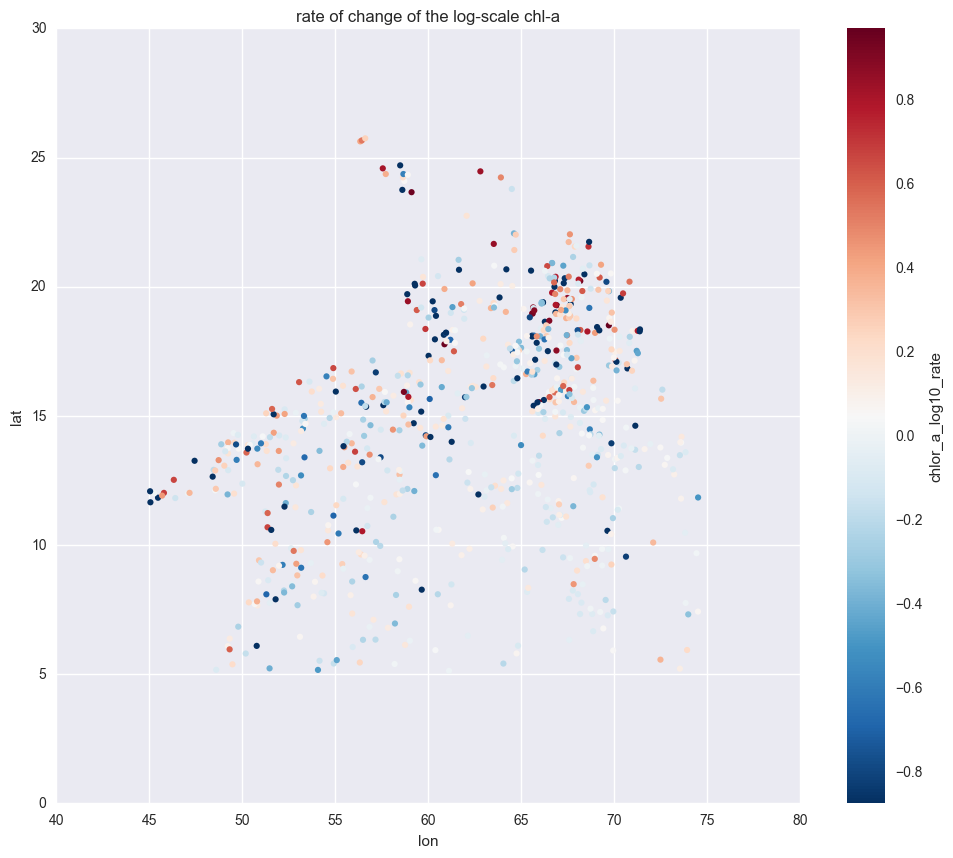

In [6]:
# visualize the ROC of log(chl_a) around the arabian sea region
fig, ax  = plt.subplots(figsize=(12,10))
df_chl_out_4D_3.plot(kind='scatter', x='lon', y='lat', c='chlor_a_log10_rate', cmap='RdBu_r', vmin=check2.median()-0.5*check2.std(), vmax=check2.max(), edgecolor='none', ax=ax, title = 'rate of change of the log-scale chl-a')

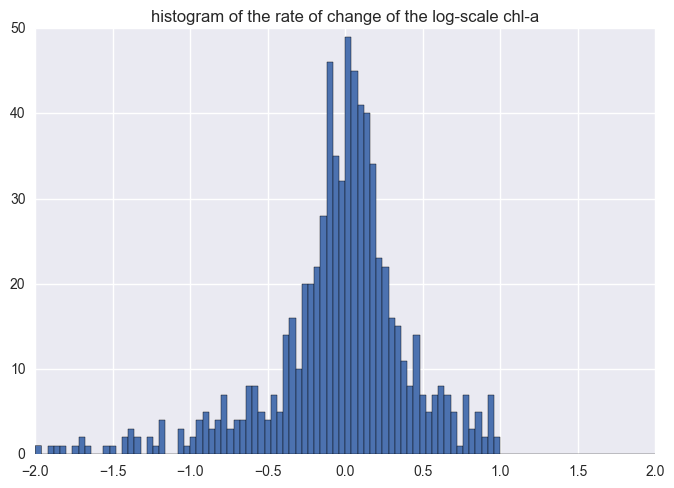

In [7]:
# histogram for non standarized data
axdf_chl = df_chl_out_4D_3.chlor_a_log10_rate.dropna().hist(bins=100,range=[-2,2]) # there are very a few small values on the left
axdf_chl.set_title('histogram of the rate of change of the log-scale chl-a')

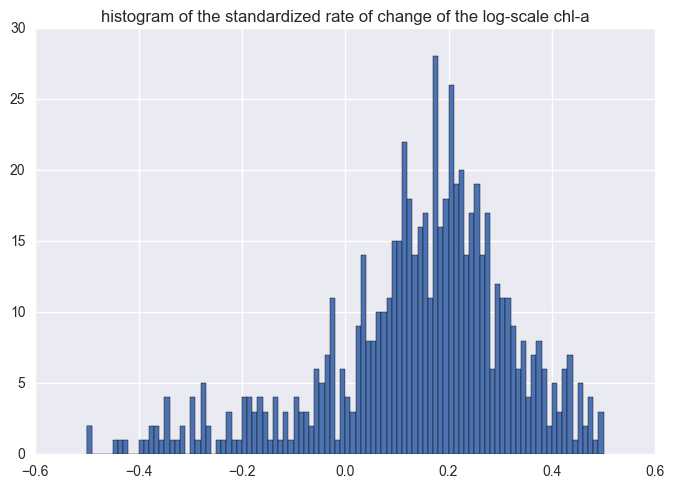

In [8]:
# standarized series
tmp = df_chl_out_4D_3.chlor_a_log10_rate.dropna()
tmp = (tmp - tmp.mean())/tmp.std()
axdf_chl_stdan = tmp.hist(bins=100,range=[-0.5,0.5])   # there are very a few small values on the left
axdf_chl_stdan.set_title('histogram of the standardized rate of change of the log-scale chl-a')

In [9]:
# id:11089, time:2002-11-07"
# (0.194167 - 0.182671) / 0.194167    == 0.059207
df_chl_out_4D_3.sort_values(by=['id', 'time']).head()

,id,time,lat,spd,var_lon,vn,var_lat,lon,ve,temp,var_tmp,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_log10_rate
index,,,,,,,,,,,,,,,,,
6476,10206,2002-11-06,11.04970,9.69775,0.001602,6.51645,0.000517,67.17675,-4.16140,NaN,1000.0,0.133946,-0.873070,0.005581,-2.253287,536.675,0.041666
6735,10206,2002-11-11,11.16030,2.94440,0.001463,1.00360,0.000474,67.11145,-0.92305,NaN,1000.0,0.125101,-0.902739,-0.008845,NaN,545.142,-0.070703
6994,10206,2002-11-16,11.16665,3.06520,0.006093,-0.48170,0.001546,67.05180,-1.90965,NaN,1000.0,0.140332,-0.852843,0.015231,-1.817272,549.511,0.108535
7771,10206,2002-12-01,11.42495,13.95980,0.003342,5.01475,0.000973,66.58490,-12.89285,NaN,1000.0,0.130924,-0.882981,-0.006660,NaN,602.274,-0.050869
9066,10206,2002-12-26,12.57970,11.05175,0.001609,1.12345,0.000532,64.48845,-10.25210,NaN,1000.0,0.163904,-0.785410,0.007255,-2.139362,841.416,0.044264


In [10]:
# CSV CSV CSV CSV with specfic index
# df_chl_out_4D_3.csv --  {lat, lon, temp, chl_rate, dist}
# df_chl_out_4D_3.csv --  {lat, lon, temp, chl_rate, dist, chlor_a_log10_rate}

# 3 represents 3 features: {temp, chl_rate, dist}
# 4 represents 4 features: {temp, chl_rate, dist, chlor_a_log10_rate }
df_chl_out_4D_3.to_csv('df_chl_out_4D_modisa_4.csv', sep=',', index_label = 'index')

# load CSV output
test = pd.read_csv('df_chl_out_4D_modisa_4.csv', index_col='index')

# a check
test.sort_values(by=['id', 'time']).head()

,id,time,lat,spd,var_lon,vn,var_lat,lon,ve,temp,var_tmp,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_log10_rate
index,,,,,,,,,,,,,,,,,
6476,10206,2002-11-06,11.04970,9.69775,0.001602,6.51645,0.000517,67.17675,-4.16140,NaN,1000.0,0.133946,-0.873070,0.005581,-2.253287,536.675,0.041666
6735,10206,2002-11-11,11.16030,2.94440,0.001463,1.00360,0.000474,67.11145,-0.92305,NaN,1000.0,0.125101,-0.902739,-0.008845,NaN,545.142,-0.070703
6994,10206,2002-11-16,11.16665,3.06520,0.006093,-0.48170,0.001546,67.05180,-1.90965,NaN,1000.0,0.140332,-0.852843,0.015231,-1.817272,549.511,0.108535
7771,10206,2002-12-01,11.42495,13.95980,0.003342,5.01475,0.000973,66.58490,-12.89285,NaN,1000.0,0.130924,-0.882981,-0.006660,NaN,602.274,-0.050869
9066,10206,2002-12-26,12.57970,11.05175,0.001609,1.12345,0.000532,64.48845,-10.25210,NaN,1000.0,0.163904,-0.785410,0.007255,-2.139362,841.416,0.044264


In [11]:
print("test")

test
